In [15]:
%matplotlib inline
from casatasks import tclean, ft, clearcal, uvsub, split
from casatools import ms, table, msmetadata
from spectral_cube import SpectralCube
import numpy as np
from astropy import units as u, visualization
from astropy.visualization import simple_norm
import glob
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

visualization.quantity_support()
ms = ms()
msmd = msmetadata()
tb = table()

In [16]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L


In [17]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults/G333.60/B3/cleanest/

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults/G333.60/B3/cleanest


In [18]:
fiterstr = "G333.60_B3_uid___A001_X1296_X1a3_continuum_merged_12M_robust{robust}_selfcal5_finaliter.image.tt0.pbcor"

In [19]:
from turbustat.statistics import psds

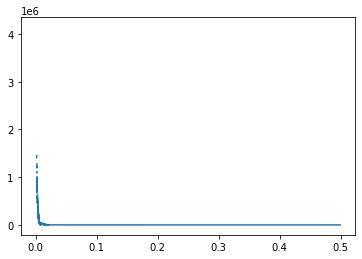

In [23]:
robust = 0
img = SpectralCube.read(fiterstr.format(robust=robust), format='casa_image')
psd2 = np.abs(np.fft.fftshift(np.fft.fft2(np.nan_to_num(img[0].value))**2))
cent, spec = psds.pspec(psd2)
pl.plot(cent, spec)

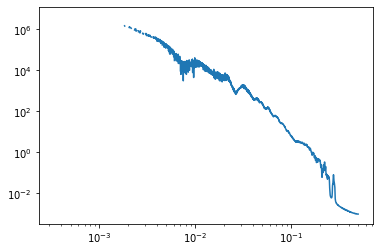

In [24]:
pl.loglog(cent, np.abs(spec))

In [25]:
pspecs = {}
for robust in (-2,-1,-0.5,0,0.5,1,2):
    img = SpectralCube.read(fiterstr.format(robust=robust), format='casa_image')
    psd2 = np.abs(np.fft.fftshift(np.fft.fft2(np.nan_to_num(img[0].value))**2))
    cent, spec = psds.pspec(psd2)
    pspecs[robust] = spec

(0.0015, 0.3)

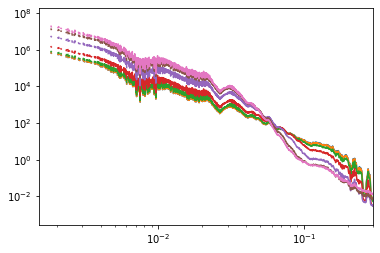

In [29]:
for robust in pspecs:
    pl.loglog(cent, pspecs[robust], label=str(robust))
pl.xlim(1.5e-3,0.3)